# Predicting Logerror For Our Zillow Database
### Braeden Wright | Junior Data Scientist | April 8, 2022
-----------

## Project Goal

   - Find the key drivers of property value for single family properties and construct an ML Regression model that will predict property tax assessed values (tax_value) for those homes.

## Initial Questions

    
   - Is there a relationship between logerror and age?
   - Does the county(fips) influence the logerror?
   - Does size of the property infuence the logerror?
   - Can taxamount or taxvaluedollarcnt be used to calculate logerror?


## Data Dictionary
Feature -----> Discription


    'airconditioningtypeid'	---> Type of cooling system present in the home (if any)
    'architecturalstyletypeid' --->	 Architectural style of the home (i.e. ranch, colonial, split-level, etc…)
    'basementsqft'	---> Finished living area below or partially below ground level
    'bathroomcnt'	---> Number of bathrooms in home including fractional bathrooms
    'bedroomcnt'	---> Number of bedrooms in home 
    'buildingqualitytypeid'	---> Overall assessment of condition of the building from best (lowest) to worst (highest)
    'buildingclasstypeid'	---> The building framing type (steel frame, wood frame, concrete/brick) 
    'calculatedbathnbr'	---> Number of bathrooms in home including fractional bathroom
    'decktypeid'	---> Type of deck (if any) present on parcel
    'threequarterbathnbr'	---> Number of 3/4 bathrooms in house (shower + sink + toilet)
    'finishedfloor1squarefeet'	---> Size of the finished living area on the first (entry) floor of the home
    'calculatedfinishedsquarefeet'	---> Calculated total finished living area of the home 
    'finishedsquarefeet6'	---> Base unfinished and finished area
    'finishedsquarefeet12'	---> Finished living area
    'finishedsquarefeet13'	---> Perimeter  living area
    'finishedsquarefeet15'	---> Total area
    'finishedsquarefeet50'	---> Size of the finished living area on the first (entry) floor of the home
    'fips'	---> Federal Information Processing Standard code -  see https://en.wikipedia.org/wiki/FIPS_county_code for more details
    'fireplacecnt'	---> Number of fireplaces in a home (if any)
    'fireplaceflag'	 ---> Is a fireplace present in this home 
    'fullbathcnt'	---> Number of full bathrooms (sink, shower + bathtub, and toilet) present in home
    'garagecarcnt'	---> Total number of garages on the lot including an attached garage
    'garagetotalsqft'	---> Total number of square feet of all garages on lot including an attached garage
    'hashottuborspa'	---> Does the home have a hot tub or spa
    'heatingorsystemtypeid'	 ---> Type of home heating system
    'latitude'	---> Latitude of the middle of the parcel multiplied by 10e6
    'longitude'	---> Longitude of the middle of the parcel multiplied by 10e6
    'lotsizesquarefeet'	--> Area of the lot in square feet
    'numberofstories'	---> Number of stories or levels the home has
    'parcelid'	 ---> Unique identifier for parcels (lots) 
    'poolcnt'	--> Number of pools on the lot (if any)
    'poolsizesum'	---> Total square footage of all pools on property
    'pooltypeid10'	---> Spa or Hot Tub
    'pooltypeid2'	---> Pool with Spa/Hot Tub
    'pooltypeid7'	---> Pool without hot tub
    'propertycountylandusecode'	---> County land use code i.e. it's zoning at the county level
    'propertylandusetypeid'	---> Type of land use the property is zoned for
    'propertyzoningdesc'	---> Description of the allowed land uses (zoning) for that property
    'rawcensustractandblock'	---> Census tract and block ID combined - also contains blockgroup assignment by extension
    'censustractandblock'	---> Census tract and block ID combined - also contains blockgroup assignment by extension
    'regionidcounty'   ---> County in which the property is located
    'regionidcity'	---> City in which the property is located (if any)
    'regionidzip'	---> Zip code in which the property is located
    'regionidneighborhood'  ---> Neighborhood in which the property is located
    'roomcnt'	---> Total number of rooms in the principal residence
    'storytypeid'	---> Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.).  See tab for details.
    'typeconstructiontypeid'	---> What type of construction material was used to construct the home
    'unitcnt'	---> Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)
    'yardbuildingsqft17'	---> Patio in  yard
    'yardbuildingsqft26'	---> Storage shed/building in yard
    'yearbuilt'	 ---> The Year the principal residence was built 
    'taxvaluedollarcnt' ---> The total tax assessed value of the parcel
    'structuretaxvaluedollarcnt'	---> The assessed value of the built structure on the parcel
    'landtaxvaluedollarcnt' ---> The assessed value of the land area of the parcel
    'taxamount'	---> The total property tax assessed for that assessment year
    'assessmentyear'	---> The year of the property tax assessment 
    'taxdelinquencyflag'	---> Property taxes for this parcel are past due as of 2015
    'taxdelinquencyyear'	---> Year for which the unpaid propert taxes were due 
    


-------
# Import Menagerie

In [1]:
# Basics
import numpy as np
import pandas as pd
import os
import scipy.stats as stats
from pydataset import data
from scipy import math


# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Models and Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import sklearn.linear_model
import sklearn.feature_selection
import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Custom
import env
import wrangle_prep as wp

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Make sure we can see the full scale of the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Downloading the dataframe, almost all data prep/cleaning is hadled already.  This process includes:
- Determining which variables from the data had too much missing information to be useful (50%+ missing info for columns, 70%+ missing info for rows).
- Pinpointing any outliers that could negatively skew our data/ model.
- Making sure that data is the right type for visualizing/ modeling.
- Remove any duplicate information from the ID column.
- Verify's that we are only working on properties that are single family properties.

### There are a few other thing we will change below

In [2]:
df = wp.wrangle_zillow()
df.head(1)

Saving to .csv


,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror
0,14297519,3.5,4.0,6.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,1286.0,96978.0,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595


## A small bit of Feature Engineering, then Split the Data, and set up other variables
- Create a column containing absolute value
- Create a column with the age of properties

In [3]:
# first with the addition of an absolute value column
df['abs_logerror'] = abs(df.logerror)

# second property age, which helps with visualization
df.yearbuilt = df.yearbuilt.astype(int)
df['age'] = 2017 - df.yearbuilt
df.yearbuilt = df.yearbuilt.astype(object)

df.head(4)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,abs_logerror,age
0,14297519,3.5,4.0,6.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,1286.0,96978.0,0.0,1998,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,0.025595,19
1,17052889,1.0,2.0,6.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,13091.0,2061.0,97099.0,5.0,1967,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,0.055619,50
2,14186244,2.0,3.0,6.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,21412.0,1286.0,97078.0,6.0,1962,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,0.005383,55
3,12177905,3.0,4.0,8.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,396551.0,3101.0,96330.0,0.0,1970,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,0.103410,47


In [4]:
# train, validate, test split
train, validate, test = wp.split_data(df)

train <> (38066, 23)
validate <> (16315, 23)
test <> (13596, 23)


In [5]:
# Data for modeling
x_train = train.drop(columns=['logerror'])
y_train = train.logerror

x_validate = validate.drop(columns=['logerror'])
y_validate = validate.logerror

x_test = test.drop(columns=['logerror'])
y_test = test.logerror

# Scaling
x_train_scaled, x_validate_scaled, x_test_scaled = wp.scale_data(x_train, x_validate, x_test)

train_scaled <> (38066, 22)
validate_scaled <> (16315, 22)
test_scaled <> (13596, 22)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67977 entries, 0 to 77573
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      67977 non-null  int64  
 1   bathroomcnt                   67977 non-null  float64
 2   bedroomcnt                    67977 non-null  float64
 3   buildingqualitytypeid         67977 non-null  float64
 4   calculatedfinishedsquarefeet  67977 non-null  float64
 5   fips                          67977 non-null  float64
 6   latitude                      67977 non-null  float64
 7   longitude                     67977 non-null  float64
 8   lotsizesquarefeet             67977 non-null  float64
 9   rawcensustractandblock        67977 non-null  float64
 10  regionidcity                  67977 non-null  float64
 11  regionidcounty                67977 non-null  float64
 12  regionidzip                   67977 non-null  float64
 13  r

# Exploration
### Univariate

In [7]:
df.describe()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,abs_logerror,age
count,6.797700e+04,67977.000000,67977.000000,67977.000000,67977.000000,67977.000000,6.797700e+04,6.797700e+04,6.797700e+04,6.797700e+04,67977.000000,67977.000000,67977.000000,67977.000000,6.797700e+04,6.797700e+04,67977.0,6.797700e+04,67977.000000,67977.000000,67977.000000,67977.000000
mean,1.301859e+07,2.202208,2.979361,6.314400,1675.335643,6049.441002,3.400452e+07,-1.181922e+08,2.785835e+04,6.049738e+07,33629.109905,2497.538903,96599.725907,1.602057,1.633991e+05,4.128805e+05,2016.0,2.494814e+05,5062.504630,0.016567,0.066315,48.171514
std,2.138710e+06,0.841592,0.980254,1.316425,764.510956,20.981742,2.689044e+05,3.618898e+05,1.204185e+05,2.082548e+05,46958.881196,814.755364,3314.077112,2.907933,1.267090e+05,3.029315e+05,0.0,2.225690e+05,3494.811018,0.164081,0.150995,22.792962
min,1.071186e+07,0.000000,0.000000,1.000000,128.000000,6037.000000,3.333953e+07,-1.194753e+08,2.360000e+02,6.037101e+07,3491.000000,1286.000000,95982.000000,0.000000,4.400000e+01,3.254000e+03,2016.0,1.610000e+02,19.920000,-4.655420,0.000002,1.000000
25%,1.153706e+07,2.000000,2.000000,6.000000,1156.000000,6037.000000,3.380559e+07,-1.184068e+08,6.000000e+03,6.037400e+07,12447.000000,1286.000000,96212.000000,0.000000,8.177700e+04,1.986290e+05,2016.0,7.919000e+04,2620.300000,-0.023628,0.013397,31.000000
50%,1.260270e+07,2.000000,3.000000,6.000000,1488.000000,6037.000000,3.401119e+07,-1.181600e+08,7.313000e+03,6.037621e+07,25218.000000,3101.000000,96412.000000,0.000000,1.309070e+05,3.466180e+05,2016.0,1.960000e+05,4277.300000,0.006325,0.030823,47.000000
75%,1.426033e+07,3.000000,4.000000,7.000000,1996.000000,6059.000000,3.417698e+07,-1.179139e+08,1.044100e+04,6.059052e+07,45457.000000,3101.000000,96993.000000,0.000000,2.048630e+05,5.389580e+05,2016.0,3.492460e+05,6506.950000,0.037433,0.064689,63.000000
max,1.629608e+08,10.000000,11.000000,12.000000,8251.000000,6111.000000,3.481877e+07,-1.175723e+08,6.971010e+06,6.111009e+07,396556.000000,3101.000000,399675.000000,14.000000,1.646927e+06,2.090230e+06,2016.0,1.786325e+06,19997.540000,3.394544,4.655420,139.000000


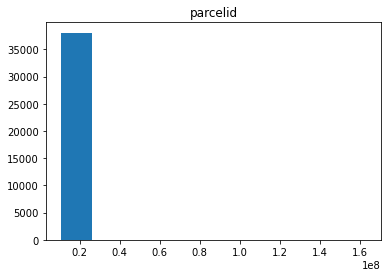

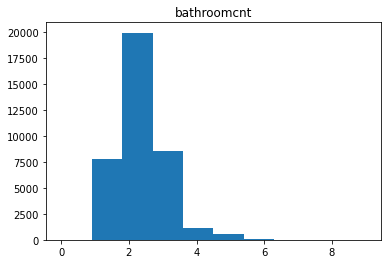

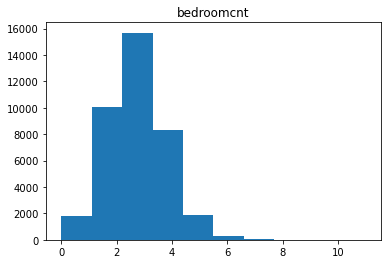

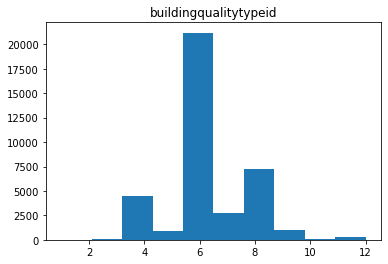

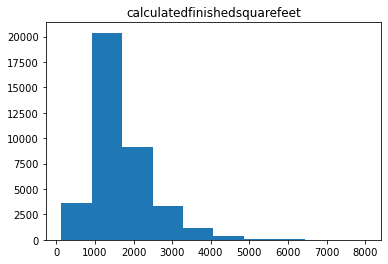

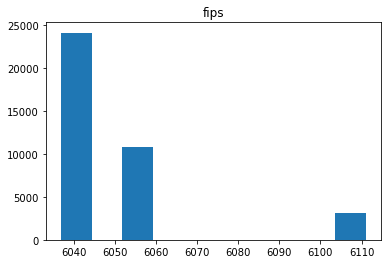

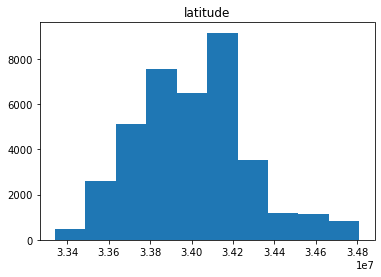

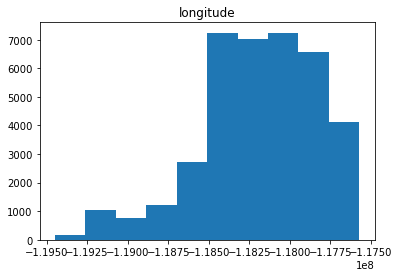

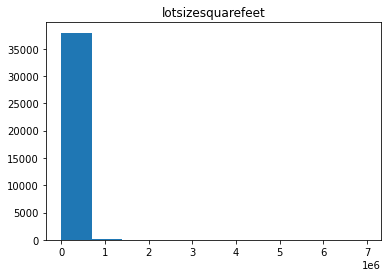

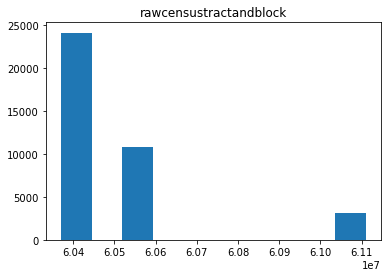

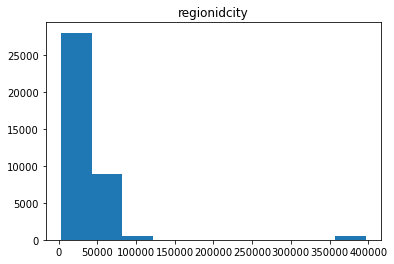

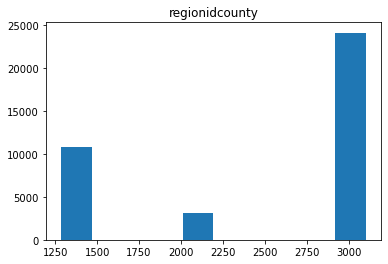

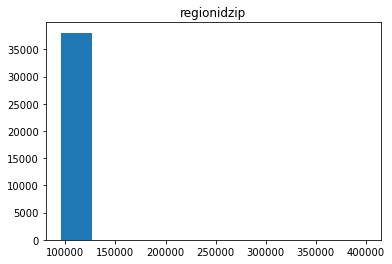

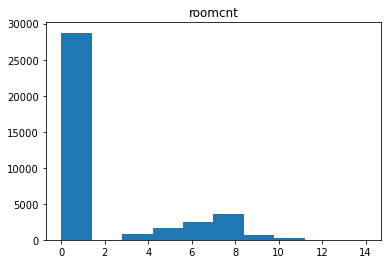

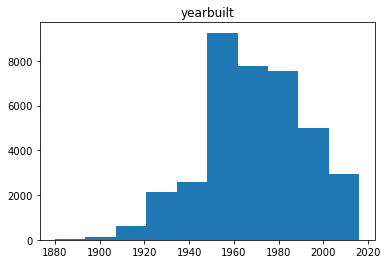

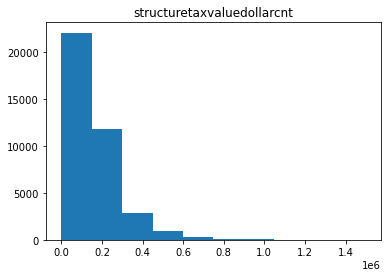

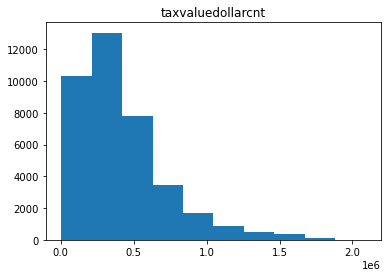

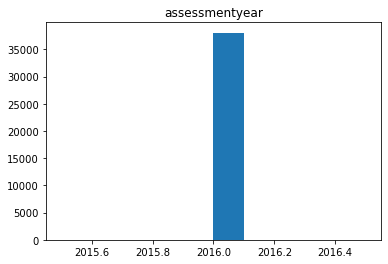

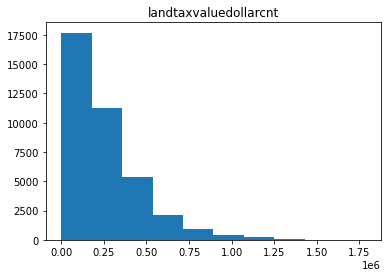

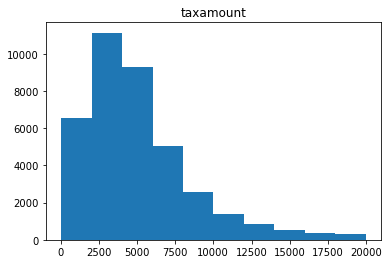

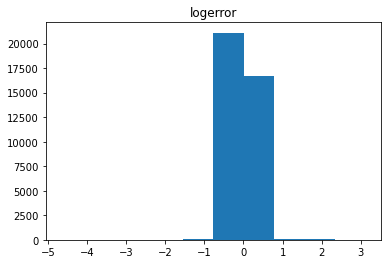

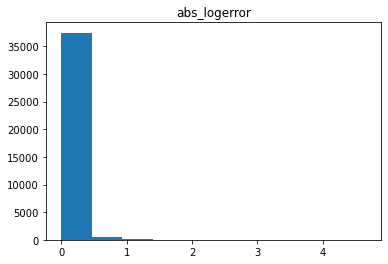

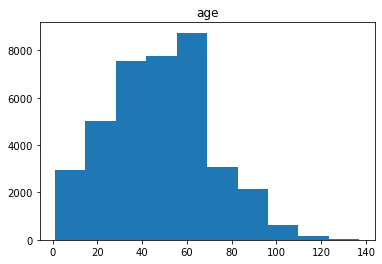

In [8]:
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

## Takeaways
- Mostly normal distribution among features
-------
# Bivariate and Multivariate Exploration
- Only looking at features that will give meaningful visualizations on logerror
- First only looking at the feature by logerror
- Second group of visuals compares those graphs with fips (county)
- Last group of graphs compare feature by logerror and group by yearbuilt

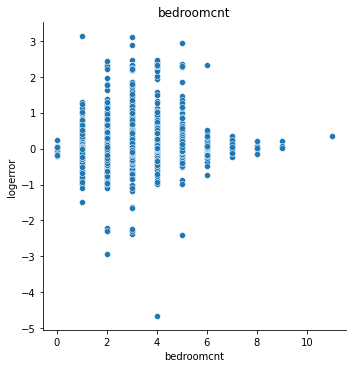

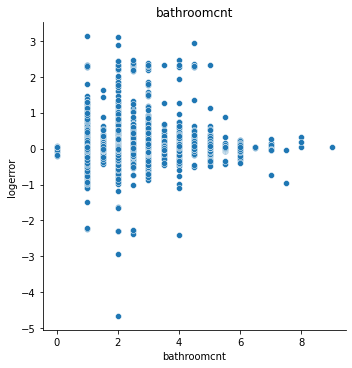

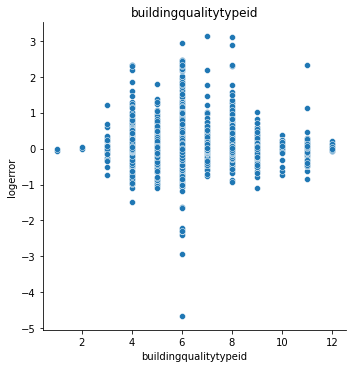

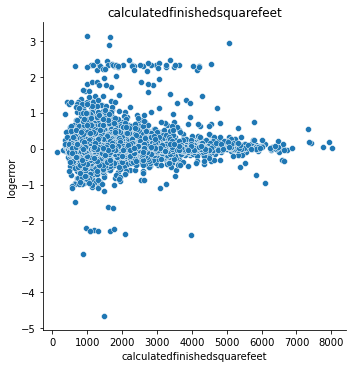

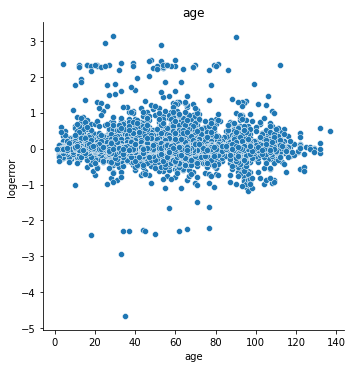

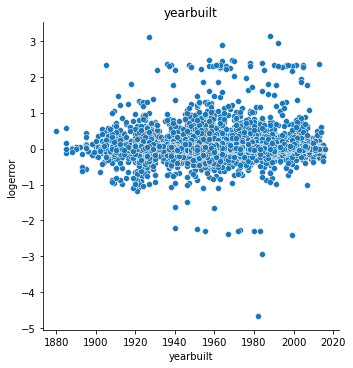

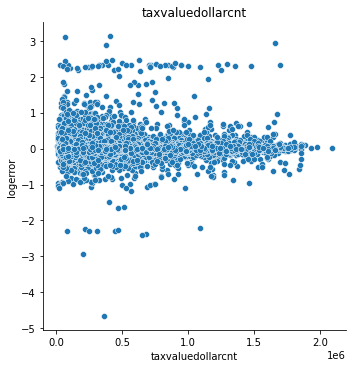

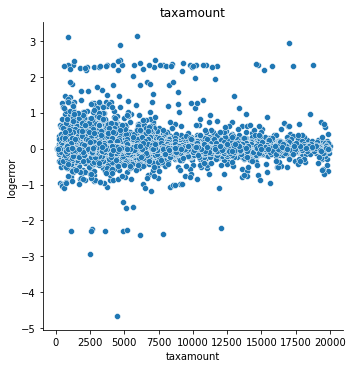

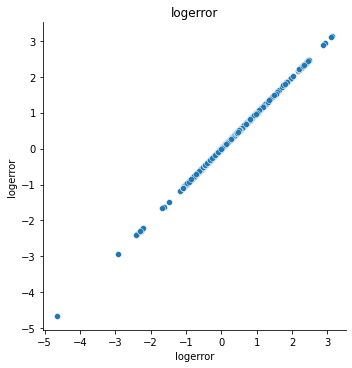

In [9]:
exp_columns = ['bedroomcnt', 'bathroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'age', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'logerror']

for col in train[exp_columns]:
    sns.relplot(x=train[col], y=train.logerror)
    plt.title(col)
    plt.show()

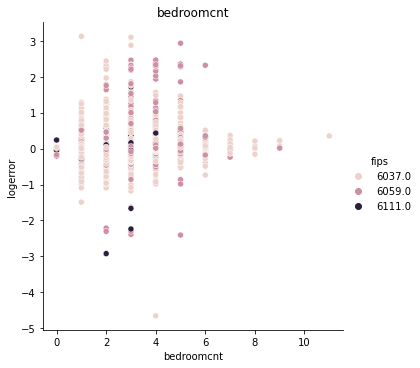

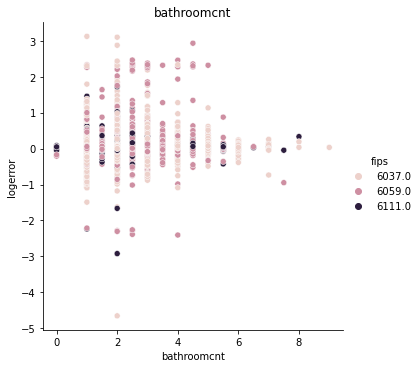

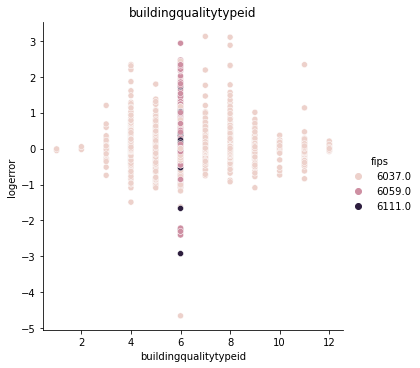

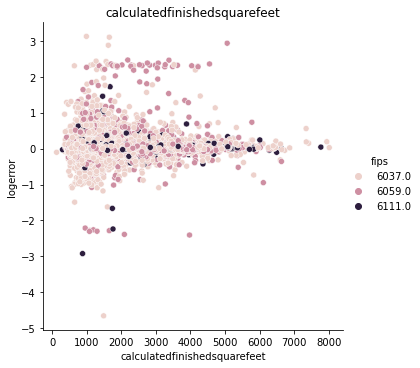

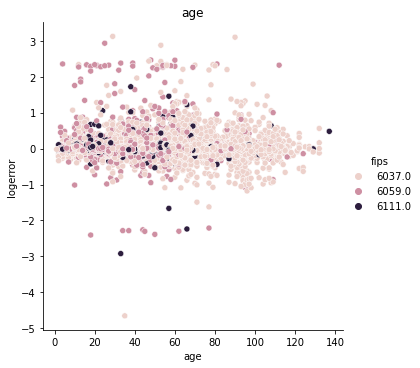

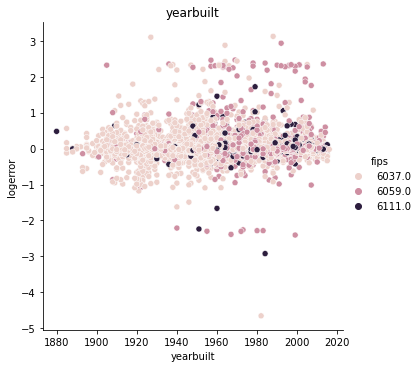

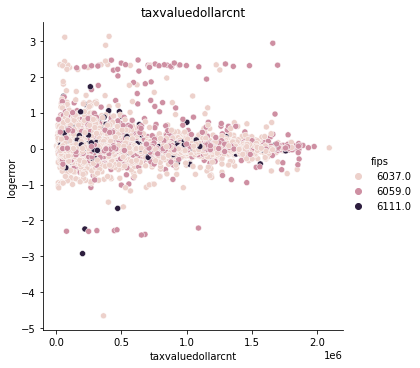

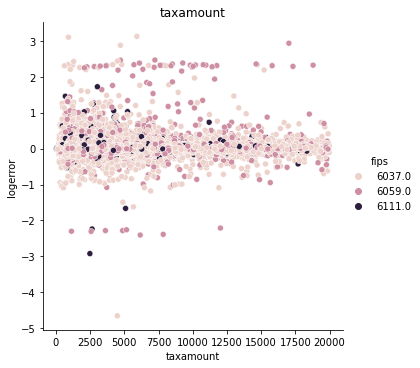

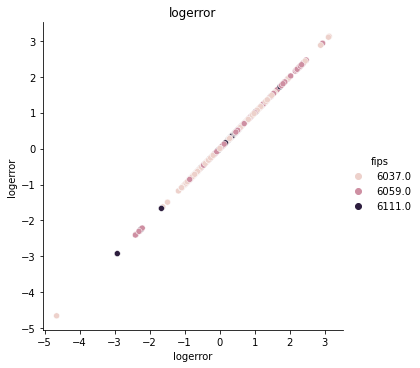

In [10]:
for col in train[exp_columns]:
    sns.relplot(x=train[col], y=train.logerror, hue=train.fips)
    plt.title(col)
    plt.show()

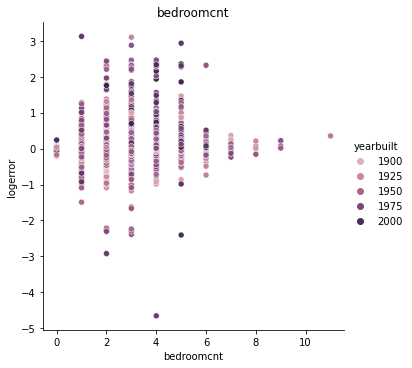

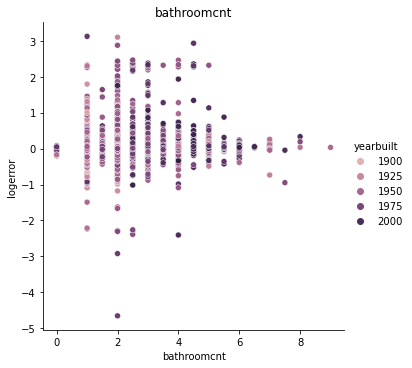

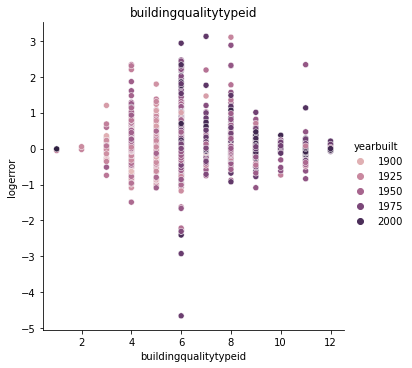

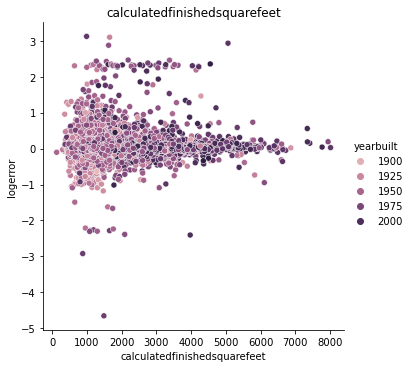

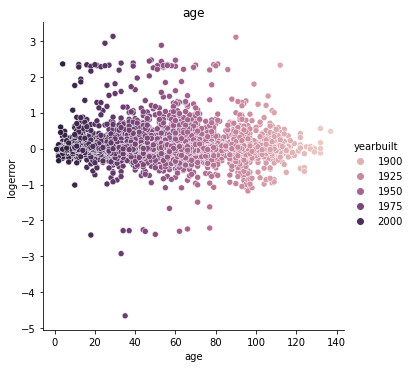

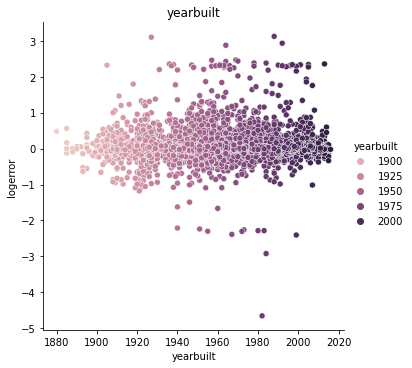

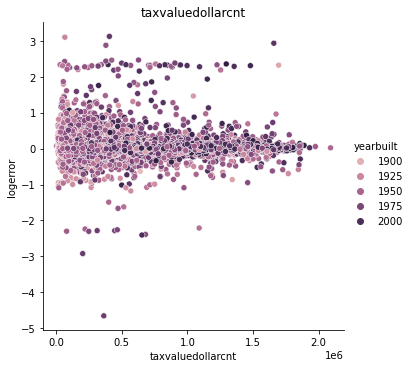

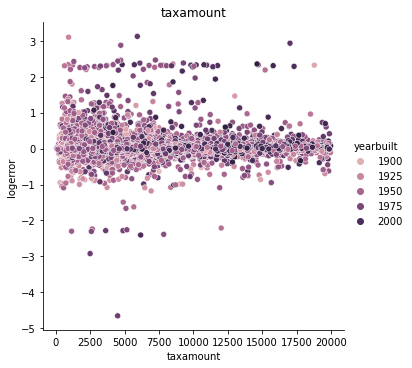

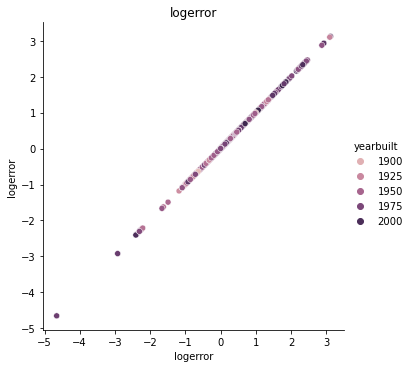

In [11]:
for col in train[exp_columns]:
    sns.relplot(x=train[col], y=train.logerror, hue=train.yearbuilt)
    plt.title(col)
    plt.show()

### For good measure I'll check for any correrlation with a heatmap

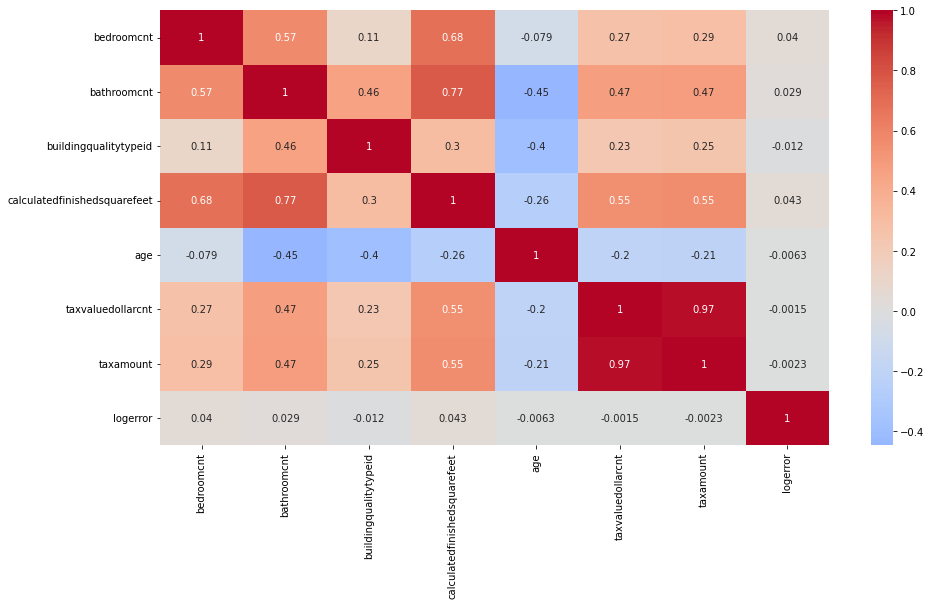

In [12]:
# Heatmap
plt.figure(figsize = (15,8))
sns.heatmap(train[exp_columns].corr(), cmap='coolwarm', center=0, annot=True)
plt.show()

# Takaways
- Newer homes tend to have higher logerror than older homes
- Higher taxamounts seem to have lower rates of logerror
- Might be worth breaking up homes by age
- LA county (fips 6037) was the only county to track buildingqualitytypeid
- Refrencing the heatmap, calulatedfinishedsquarefeet was the feature that showed the most impact on log error
---------
## Questions to explore and verify:
- Is there a relationship between logerror and age?
- Does the county(fips) influence the logerror?
- Does size of the property infuence the logerror?
- Can taxamount or taxvaluedollarcnt be used to calculate logerror?
----
### Question 1 
#### Is there a relationship between logerror and age?
- Visualize Log Error by Year Built
- Test for correlation and explore any insights

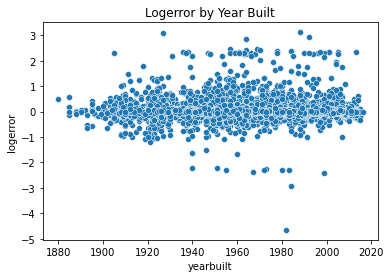

In [13]:
sns.scatterplot(data=train, y='logerror', x='yearbuilt')
plt.title('Logerror by Year Built')
plt.show()

In [14]:
stats.ttest_ind(train.yearbuilt, train.logerror,
                equal_var=True)

Ttest_indResult(statistic=16819.059485896098, pvalue=0.0)

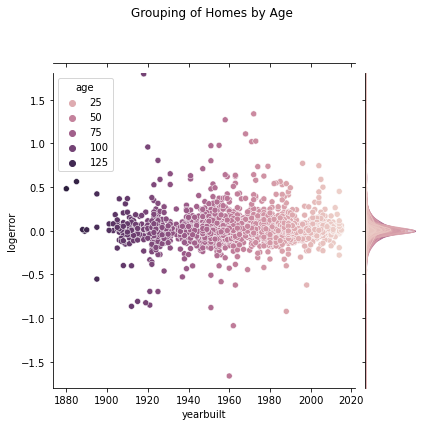

In [15]:
# logerror seems to be better before the 1950's

sample = train.sample(5000)

sns.jointplot('yearbuilt', 'logerror', data=sample, kind='scatter', hue='age', ylim=(-1.8, 1.8))
plt.suptitle('Grouping of Homes by Age')

plt.show()

In [16]:
# H0: Homes built before 1950 have no difference in logerror than homes built past 1950
# Ha: Homes built before 1950 have significant differences in logerror than homes built past 1950

stats.levene(train[train.yearbuilt <= 1950].logerror, 
             train[train.yearbuilt > 1950].logerror
            )

LeveneResult(statistic=313.67364588868776, pvalue=6.604776915086508e-70)

In [17]:
# Can assume Equal Varience
stats.ttest_ind(train[train.yearbuilt <= 1950].logerror,
                train[train.yearbuilt >1950].logerror,
                equal_var=True)

Ttest_indResult(statistic=-2.3778230931149356, pvalue=0.01742008660265203)

### The T-Test confirms we can reject the null hypothesis
- Alternative Hypothesis(Ha): Homes built before 1950 have significant differences in logerror than homes built past 1950
-------
# Question 2
- Does the county(fips) influence the logerror?

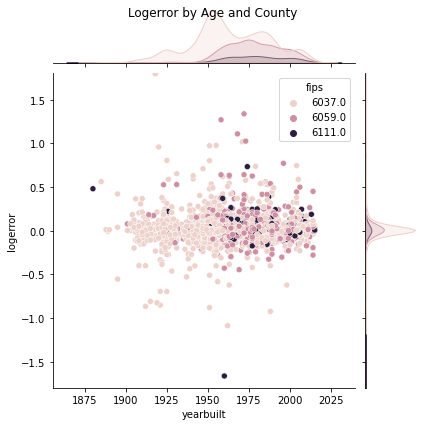

In [18]:
# Lets compare fips on our last graph
sns.jointplot('yearbuilt', 'logerror', data=sample, kind='scatter', hue='fips', ylim=(-1.8, 1.8))
plt.suptitle('Logerror by Age and County')

plt.show()

## The graph shows that older homes seem to consist primarily of LA County
------
# Confirm with stats

In [19]:
# confirm with stats

# H0: LA County propeties has no significant impact on logerror than Orange and Ventura Counties
# Ha: LA County propeties does have a significant impact on logerror than Orange and Ventura Counties

stats.levene(train[train.fips == 6037].logerror, 
             train[train.fips != 6037].logerror
            )

LeveneResult(statistic=35.71270627924118, pvalue=2.306969287718477e-09)

In [20]:
# Can assume Equal Variance
# T-test
stats.ttest_ind(train[train.fips == 6037].logerror,
                train[train.fips != 6037].logerror,
                equal_var=True)

Ttest_indResult(statistic=-3.2780584817626086, pvalue=0.001046174044004433)

### The T-Test confirms we can reject the null hypothesis¶

   - Alternative Hypothesis(Ha): Properties in LA County have significant differences in logerror vs properties in other counties.
------
# Question 3
 ### Does size of the property infuence the logerror?
 - I'm going to look particularly at calulatedfinishedsquarefeet

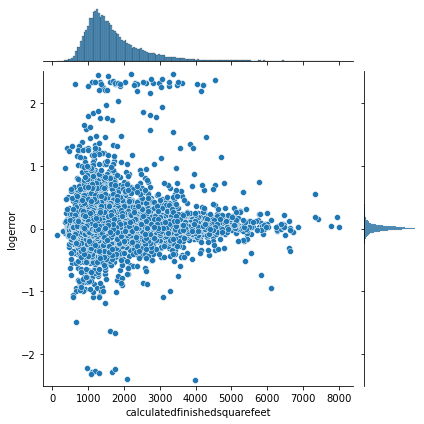

In [21]:
sns.jointplot(x='calculatedfinishedsquarefeet', y='logerror', data=train, ylim=(-2.5, 2.5))
plt.show()

## Takeaways
- Smaller homes definitely have a higher log error
- As home get larger in square feet the log error decreases, clearly indicating some kind of correlation(as forecasted by the heatmap earlier)
---------
# Building clusters to explore and potentially build a model with
- Using 'calculatedfinishedsquarefeet' and 'taxamount', find what k value has the best inertia
- 
- 

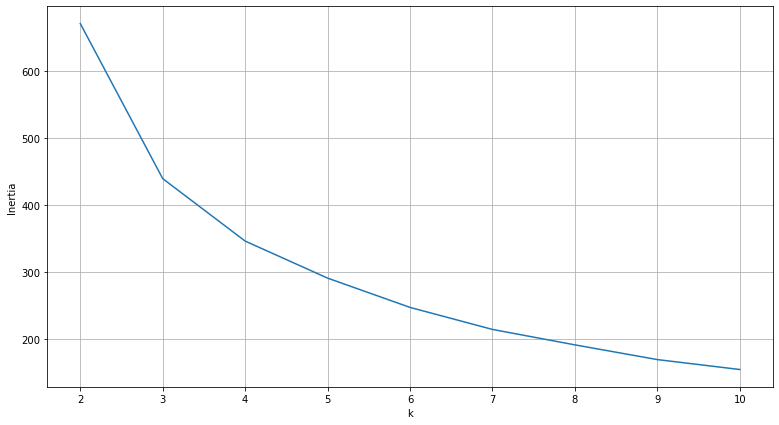

In [22]:
cols = ['calculatedfinishedsquarefeet', 'taxamount']
X = x_train_scaled[cols]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

In [23]:
# I'll go with a k value of 3 for my cluster

kmeans = KMeans(n_clusters=3).fit(X)
train['cluster_area_tax'] = kmeans.predict(X)
train.cluster_area_tax = train.cluster_area_tax.astype('category')

# means of each feature by cluster
train.groupby('cluster_area_tax').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,abs_logerror,age
cluster_area_tax,,,,,,,,,,,,,,,,,,,,,,
0,1.291063e+07,1.878834,2.700866,6.063030,1333.138141,6048.075158,3.402500e+07,-1.181889e+08,33123.428050,6.048395e+07,34239.249122,2566.551861,96574.194240,1.414048,99517.938188,2.191687e+05,2016.0,119650.782206,2776.127409,0.018601,0.068655,52.522501
1,1.312919e+07,2.434169,3.228663,6.529637,1893.547964,6051.102446,3.399016e+07,-1.181950e+08,19954.288015,6.051374e+07,32696.359865,2423.036270,96599.840733,1.902615,199942.873936,5.396281e+05,2016.0,339685.264397,6543.285434,0.013792,0.057775,43.653938
2,1.314989e+07,3.228338,3.740054,7.014714,2869.724523,6051.032698,3.394448e+07,-1.182084e+08,21091.543597,6.051278e+07,31647.564305,2394.598093,96603.723433,1.579564,399954.874659,1.090283e+06,2016.0,690327.940327,13073.267221,0.027756,0.081280,40.193460


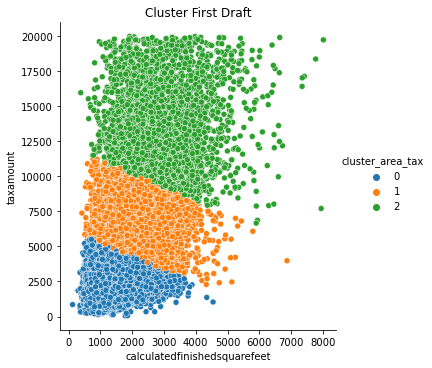

In [24]:
# Visualize clusters
sns.relplot(data=train, y='taxamount', x='calculatedfinishedsquarefeet', hue='cluster_area_tax')
plt.title('Cluster First Draft')

plt.show()

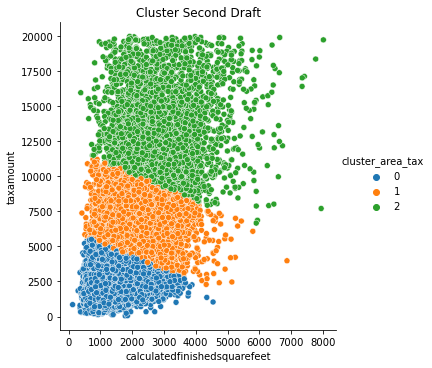

In [25]:
# rinse and repeat
train['cluster_area_tax'] = kmeans.predict(X)
train.cluster_area_tax = train.cluster_area_tax.astype('category')

# visualize
sns.relplot(data=train, y='taxamount', x='calculatedfinishedsquarefeet', hue='cluster_area_tax')
plt.title('Cluster Second Draft')

plt.show()

## Takeaways
- There seems to be little change to the cluster after refitting
- Cluster 1 has the lowest logerror and abs_logerror, while the mean for other feature was not as useful
--------
# Continued Cluster Exploration 
- I know from my earlier exploration that age was an indicator
- I want to check with calculatedfinishedsquarefeet and taxamount as well, and then perhaps seperately

In [26]:
# features to make cluster with
cols = ['calculatedfinishedsquarefeet', 'taxamount', 'age']
X = x_train_scaled[cols]

# make it
kmeans = KMeans(n_clusters=3).fit(X)
train['cluster_area_tax_age'] = kmeans.predict(X)
train.cluster_area_tax_age = train.cluster_area_tax_age.astype('category')

# Visualize clusters
train.groupby('cluster_area_tax_age').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,abs_logerror,age
cluster_area_tax_age,,,,,,,,,,,,,,,,,,,,,,
0,1.288971e+07,2.021478,3.071276,6.132402,1560.755384,6047.954240,3.399678e+07,-1.182038e+08,23558.951043,6.048251e+07,33042.191173,2546.360307,96565.473419,2.066846,122853.119448,359355.452277,2016.0,236502.332829,4407.347490,0.019717,0.067941,56.965231
1,1.341184e+07,2.572214,2.967769,6.801917,1870.743052,6054.102419,3.400912e+07,-1.181622e+08,37604.852226,6.054385e+07,30688.883814,2299.062597,96716.919583,1.444802,222979.728062,481542.569480,2016.0,258562.841418,5874.102058,0.017381,0.053393,26.275476
2,1.212399e+07,1.638593,2.688699,5.392537,1446.608316,6039.290832,3.402504e+07,-1.182533e+08,8602.900426,6.039630e+07,44239.358635,2996.243070,96228.739019,0.318124,115944.831557,389307.544136,2016.0,273362.712580,4839.064825,0.012193,0.101582,88.313220


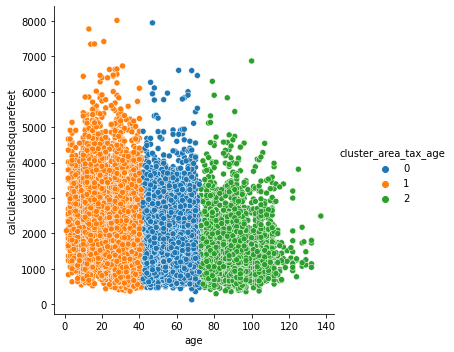

In [27]:
sns.relplot(data=train, y='calculatedfinishedsquarefeet', x='age', hue='cluster_area_tax_age')
plt.show()

In [28]:
# Not great results.  Need to narrow my search
# features to make cluster with
cols = ['calculatedfinishedsquarefeet', 'age']
X = x_train_scaled[cols]

# make it
kmeans = KMeans(n_clusters=3).fit(X)
train['cluster_area_age'] = kmeans.predict(X)
train.cluster_area_age = train.cluster_area_age.astype('category')

# Visualize clusters
train.groupby('cluster_area_age').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,abs_logerror,age
cluster_area_age,,,,,,,,,,,,,,,,,,,,,,
0,1.341184e+07,2.572214,2.967769,6.801917,1870.743052,6054.102419,3.400912e+07,-1.181622e+08,37604.852226,6.054385e+07,30688.883814,2299.062597,96716.919583,1.444802,222979.728062,481542.569480,2016.0,258562.841418,5874.102058,0.017381,0.053393,26.275476
1,1.288971e+07,2.021478,3.071276,6.132402,1560.755384,6047.954240,3.399678e+07,-1.182038e+08,23558.951043,6.048251e+07,33042.191173,2546.360307,96565.473419,2.066846,122853.119448,359355.452277,2016.0,236502.332829,4407.347490,0.019717,0.067941,56.965231
2,1.212399e+07,1.638593,2.688699,5.392537,1446.608316,6039.290832,3.402504e+07,-1.182533e+08,8602.900426,6.039630e+07,44239.358635,2996.243070,96228.739019,0.318124,115944.831557,389307.544136,2016.0,273362.712580,4839.064825,0.012193,0.101582,88.313220


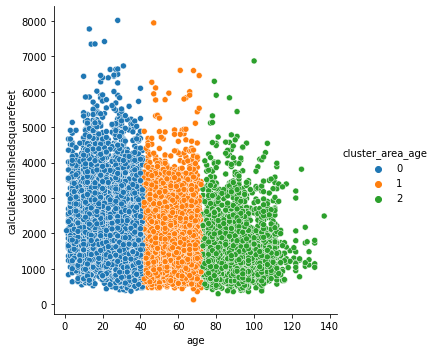

In [29]:
# Visualize
# Refinement didn't seem to change the cluster 
sns.relplot(data=train, y='calculatedfinishedsquarefeet', x='age', hue='cluster_area_age')
plt.show()

## Takeaways
- This clustering seems to just seperate homes by age into 3 groups(0-40, 40-75, 75 and up)
- While the metrics for each cluster do have some distinct differences, most of the older homes will also only be in LA County, per our previous data

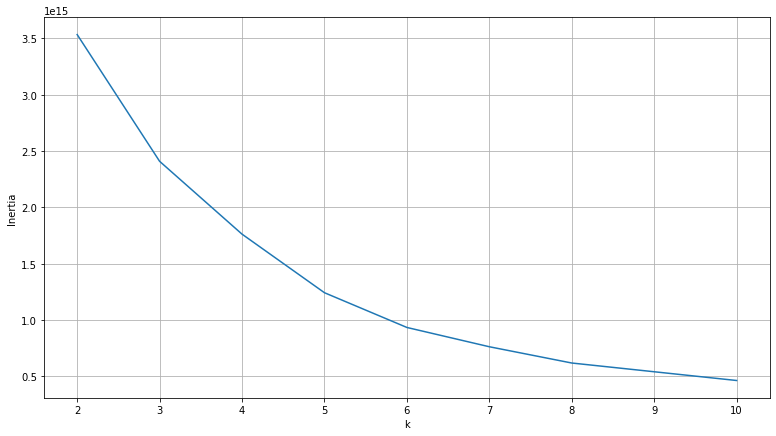

In [30]:
cols = ['latitude', 'longitude', 'age']
X = x_train_scaled[cols]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

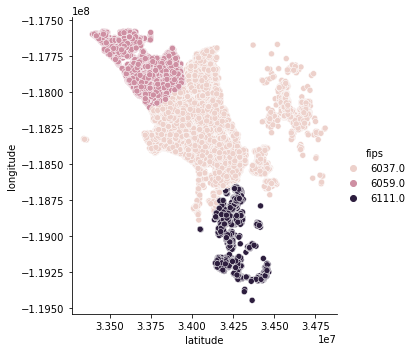

In [31]:
# a quick reference to county by geographical location
sns.relplot(data=train, x='latitude', y='longitude', hue='fips')
plt.show()

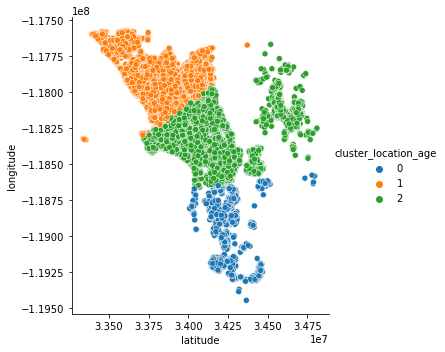

In [32]:
# Put together the cluster
cols = ['latitude', 'longitude', 'age']
X = x_train_scaled[cols]

# make it
kmeans = KMeans(n_clusters=3).fit(X)
train['cluster_location_age'] = kmeans.predict(X)
train.cluster_location_age = train.cluster_location_age.astype('category')

# Visualize clusters
sns.relplot(data=train, x='latitude', y='longitude', hue='cluster_location_age')
plt.show()

In [33]:
# metrics
train.groupby('cluster_location_age').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,abs_logerror,age
cluster_location_age,,,,,,,,,,,,,,,,,,,,,,
0,1.648559e+07,2.400194,3.318547,6.194067,1922.446632,6102.157749,3.424462e+07,-1.189533e+08,19050.151927,6.102242e+07,28975.218741,2185.269476,96848.847519,5.722761,211719.811478,449849.895481,2016.0,238130.084003,5319.613285,0.018638,0.054859,37.339895
1,1.377038e+07,2.200694,3.030738,6.027748,1685.044193,6051.166726,3.379595e+07,-1.178871e+08,14947.068652,6.051376e+07,32449.997967,1932.245066,96737.830224,2.401866,155394.082287,417618.234362,2016.0,262224.152075,4980.448419,0.022471,0.060401,44.954132
2,1.158328e+07,2.156904,2.867339,6.609630,1611.503580,6037.000000,3.415401e+07,-1.183266e+08,40949.532672,6.037422e+07,35325.955629,3101.000000,96389.035124,0.000000,160022.651801,401023.612730,2016.0,241000.960929,5081.083232,0.013303,0.073856,53.673733


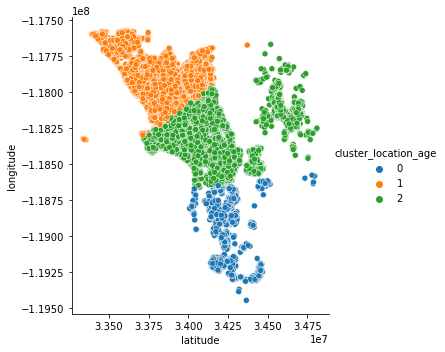

In [34]:
# Rinse and Repeat (cluster again)
train['cluster_location_age'] = kmeans.predict(X)
train.cluster_location_age = train.cluster_location_age.astype('category')

# Visualize clusters
sns.relplot(data=train, x='latitude', y='longitude', hue='cluster_location_age')
plt.show()

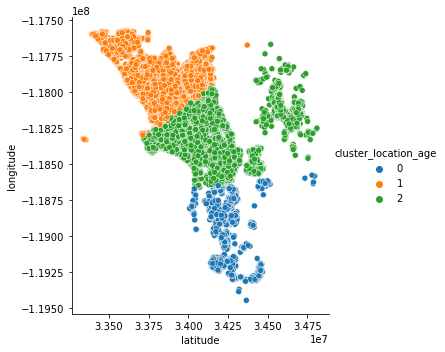

In [35]:
# Rinse and Repeat (cluster again)
train['cluster_location_age'] = kmeans.predict(X)
train.cluster_location_age = train.cluster_location_age.astype('category')

# Visualize clusters
sns.relplot(data=train, x='latitude', y='longitude', hue='cluster_location_age')
plt.show()

## Takeaways
- Cluster 3 seems to consist of only LA County(fips 6037), as well as older homes and a tendincy for more negative logerrors.
- Doesnt divide the data too much differently than if we grouped by fips. 
------
### Compare the clusters and see which would be best (if any) to use as a feature for modeling
------
# calculatedfinishedsquarefeet and age

In [36]:
# calculatedfinishedsquarefeet and age
train.groupby('cluster_area_age').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,abs_logerror,age
cluster_area_age,,,,,,,,,,,,,,,,,,,,,,
0,1.341184e+07,2.572214,2.967769,6.801917,1870.743052,6054.102419,3.400912e+07,-1.181622e+08,37604.852226,6.054385e+07,30688.883814,2299.062597,96716.919583,1.444802,222979.728062,481542.569480,2016.0,258562.841418,5874.102058,0.017381,0.053393,26.275476
1,1.288971e+07,2.021478,3.071276,6.132402,1560.755384,6047.954240,3.399678e+07,-1.182038e+08,23558.951043,6.048251e+07,33042.191173,2546.360307,96565.473419,2.066846,122853.119448,359355.452277,2016.0,236502.332829,4407.347490,0.019717,0.067941,56.965231
2,1.212399e+07,1.638593,2.688699,5.392537,1446.608316,6039.290832,3.402504e+07,-1.182533e+08,8602.900426,6.039630e+07,44239.358635,2996.243070,96228.739019,0.318124,115944.831557,389307.544136,2016.0,273362.712580,4839.064825,0.012193,0.101582,88.313220


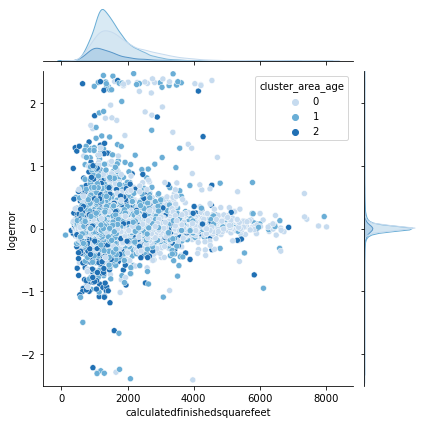

In [37]:
# calculatedfinishedsquarefeet and age
sns.jointplot(x='calculatedfinishedsquarefeet', y='logerror', data=train, hue='cluster_area_age', palette='Blues', ylim=(-2.5, 2.5))
plt.show()

# calculatedfinishedsquarefeet and taxamount

In [38]:
# calculatedfinishedsquarefeet and taxamount
train.groupby('cluster_area_tax').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,abs_logerror,age
cluster_area_tax,,,,,,,,,,,,,,,,,,,,,,
0,1.291063e+07,1.878834,2.700866,6.063030,1333.138141,6048.075158,3.402500e+07,-1.181889e+08,33123.428050,6.048395e+07,34239.249122,2566.551861,96574.194240,1.414048,99517.938188,2.191687e+05,2016.0,119650.782206,2776.127409,0.018601,0.068655,52.522501
1,1.312919e+07,2.434169,3.228663,6.529637,1893.547964,6051.102446,3.399016e+07,-1.181950e+08,19954.288015,6.051374e+07,32696.359865,2423.036270,96599.840733,1.902615,199942.873936,5.396281e+05,2016.0,339685.264397,6543.285434,0.013792,0.057775,43.653938
2,1.314989e+07,3.228338,3.740054,7.014714,2869.724523,6051.032698,3.394448e+07,-1.182084e+08,21091.543597,6.051278e+07,31647.564305,2394.598093,96603.723433,1.579564,399954.874659,1.090283e+06,2016.0,690327.940327,13073.267221,0.027756,0.081280,40.193460


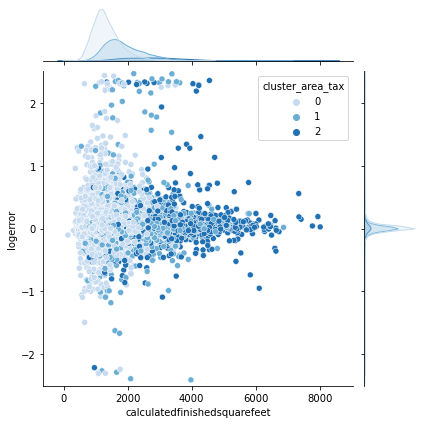

In [39]:
# calculatedfinishedsquarefeet and taxamount
sns.jointplot(x='calculatedfinishedsquarefeet', y='logerror', data=train, hue='cluster_area_tax', palette='Blues', ylim=(-2.5, 2.5))
plt.show()

# latitude, longitude, age

In [40]:
# latitude, longitude, age
train.groupby('cluster_location_age').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,abs_logerror,age
cluster_location_age,,,,,,,,,,,,,,,,,,,,,,
0,1.648559e+07,2.400194,3.318547,6.194067,1922.446632,6102.157749,3.424462e+07,-1.189533e+08,19050.151927,6.102242e+07,28975.218741,2185.269476,96848.847519,5.722761,211719.811478,449849.895481,2016.0,238130.084003,5319.613285,0.018638,0.054859,37.339895
1,1.377038e+07,2.200694,3.030738,6.027748,1685.044193,6051.166726,3.379595e+07,-1.178871e+08,14947.068652,6.051376e+07,32449.997967,1932.245066,96737.830224,2.401866,155394.082287,417618.234362,2016.0,262224.152075,4980.448419,0.022471,0.060401,44.954132
2,1.158328e+07,2.156904,2.867339,6.609630,1611.503580,6037.000000,3.415401e+07,-1.183266e+08,40949.532672,6.037422e+07,35325.955629,3101.000000,96389.035124,0.000000,160022.651801,401023.612730,2016.0,241000.960929,5081.083232,0.013303,0.073856,53.673733


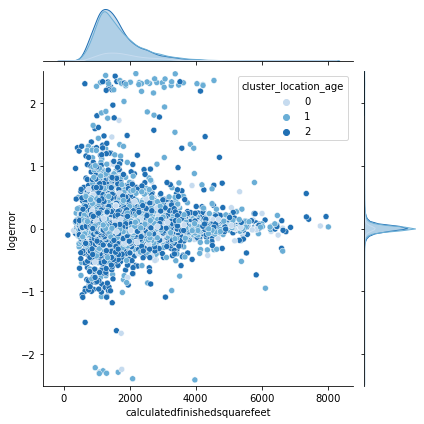

In [41]:
# latitude, longitude, age
sns.jointplot(x='calculatedfinishedsquarefeet', y='logerror', data=train, hue='cluster_location_age', palette='Blues', ylim=(-2.5, 2.5))
plt.show()

## Takeaways
- Based off visuals and metrics taken on the 3 cluster groups, the cluster_area_tax group has the most relevant data that will hold the most weight for a model
- cluster_area_tax will more than likely be the only cluster group I use as a feature when modeling
---------
# Let's Build Some Models

In [42]:
# set up cluster for validate
cols = ['calculatedfinishedsquarefeet', 'taxamount']
X = x_validate_scaled[cols]

# make it
kmeans = KMeans(n_clusters=3).fit(X)
validate['cluster_area_tax'] = kmeans.predict(X)
validate.cluster_area_tax = validate.cluster_area_tax.astype('category')


# add cluster to data
dummy_df = pd.get_dummies(train['cluster_area_tax'], dummy_na=False, drop_first=True)

# append dummy df cols to train 
x_train_scaled = pd.concat([x_train_scaled, dummy_df], axis=1)

# add cluster to validate data
dummy_df = pd.get_dummies(validate['cluster_area_tax'], dummy_na=False, drop_first=True)

# append dummy df cols to validate 
x_validate_scaled = pd.concat([x_validate_scaled, dummy_df], axis=1)


# train
predictions = pd.DataFrame()
predictions['actual'] = train.logerror
predictions['baseline'] = train.logerror.median()

# validate
validate_predictions = pd.DataFrame()
validate_predictions['actual'] = validate.logerror
validate_predictions['baseline'] = validate.logerror.median()

# Advanced Baseline Model - Simple Linear Regression

In [43]:
# Our 'Adv. Baseline' is just a simple linear regression based off sqr_feet

x_train_bl = x_train_scaled[['age']]
x_validate_bl = x_validate_scaled[['age']]

model = sklearn.linear_model.LinearRegression()

# train
model.fit(x_train_bl, y_train)
predictions['adv_baseline'] = model.predict(x_train_bl)

# validate
validate_predictions['adv_baseline_validate'] = model.predict(x_validate_bl)

# score
model.score(x_train_bl, y_train)

3.921337468815178e-05

In [44]:
# The math behind our advanced baseline model
m, b = model.coef_[0], model.intercept_

print(f'Tax Value = {m:.4f} x sqr_feet + {b:.4f}')

Tax Value = -0.0000 x sqr_feet + 0.0200


# Multiple Regression

In [45]:
# multiple regression
model = sklearn.linear_model.LinearRegression()

# train
model.fit(x_train_scaled, y_train)
predictions['multi_regression'] = model.predict(x_train_scaled)

# validate
validate_predictions['multi_regression_validate'] = model.predict(x_validate_scaled)

# score
model.score(x_train_scaled, y_train)

0.24597474411755937

# Multiple regression with RME

In [46]:
# Multiple regression with RME
model = sklearn.linear_model.LinearRegression()
rfe = sklearn.feature_selection.RFE(model, n_features_to_select=4)

# train
rfe.fit(x_train_scaled, y_train)
x_train_rfe = rfe.transform(x_train_scaled)
model.fit(x_train_rfe, y_train)
predictions['multiple_rfe'] = model.predict(x_train_rfe)

# validate
x_validate_rfe = rfe.transform(x_validate_scaled)
validate_predictions['multiple_rfe_validate'] = model.predict(x_validate_rfe)

# score
model.score(x_train_rfe, y_train)

0.0002991953491635613

# KNN (k=2)

In [47]:
# KNN (k=2)
model = KNeighborsRegressor(n_neighbors=2)

# train
model.fit(x_train_scaled, y_train)
predictions['KNN(k=2)'] = model.predict(x_train_scaled)

# validate
validate_predictions['KNN(k=2)_validate'] = model.predict(x_validate_scaled)

# score
model.score(x_train_scaled, y_train)

0.4992524287031025

# Compare our train and validate predictions

In [48]:
# Compare how these models work on the train sample
pd.concat([
    predictions.apply(lambda col: r2_score(predictions.actual, col)).rename('r2'),
    predictions.apply(lambda col: mean_squared_error(predictions.actual, col)).rename('mse'),
], axis=1).assign(
    rmse=lambda df: df.mse.apply(math.sqrt)
)

,r2,mse,rmse
actual,1.000000,0.000000,0.000000
baseline,-0.004977,0.025716,0.160361
adv_baseline,0.000039,0.025587,0.159960
multi_regression,0.245975,0.019294,0.138903
multiple_rfe,0.000299,0.025581,0.159939
KNN(k=2),0.499252,0.012813,0.113195


In [49]:
# Compare how these models work on the validate sample
pd.concat([
    validate_predictions.apply(lambda col: r2_score(validate_predictions.actual, col)).rename('r2'),
    validate_predictions.apply(lambda col: mean_squared_error(validate_predictions.actual, col)).rename('mse'),
], axis=1).assign(
    rmse=lambda df: df.mse.apply(math.sqrt)
)

,r2,mse,rmse
actual,1.000000,0.000000,0.000000
baseline,-0.003538,0.027666,0.166330
adv_baseline_validate,-0.000126,0.027572,0.166047
multi_regression_validate,0.171768,0.022833,0.151105
multiple_rfe_validate,-0.000111,0.027571,0.166046
KNN(k=2)_validate,-0.448568,0.039934,0.199835


# Takeaways
- Going to use RMSE to compare our model to determine how much error the typical prediction will have. 
- With that in mind, I will go with the multiple regression model that out-performs the baseline RMSE 
- This will be the only model to be used on test
------
# Verify Model on Unseen Data (Test)

In [50]:
# add cluster to test data
# set up cluster for validate
cols = ['calculatedfinishedsquarefeet', 'taxamount']
X = x_test_scaled[cols]

# make it
kmeans = KMeans(n_clusters=3).fit(X)
test['cluster_area_tax'] = kmeans.predict(X)
test.cluster_area_tax = test.cluster_area_tax.astype('category')
dummy_df = pd.get_dummies(test['cluster_area_tax'], dummy_na=False, drop_first=True)

# append dummy df cols to the original df. 
x_test_scaled = pd.concat([x_test_scaled, dummy_df], axis=1)


# test predictions and baseline
test_predictions = pd.DataFrame()
test_predictions['actual'] = test.logerror
test_predictions['baseline'] = test.logerror.median()

In [51]:
# make it
model = sklearn.linear_model.LinearRegression()

# fit it
model.fit(x_train_scaled, y_train)

# use it
test_predictions['multi_regression'] = model.predict(x_test_scaled)

In [52]:
pd.concat([
    test_predictions.apply(lambda col: r2_score(test_predictions.actual, col)).rename('r2'),
    test_predictions.apply(lambda col: mean_squared_error(test_predictions.actual, col)).rename('mse'),
], axis=1).assign(
    rmse=lambda df: df.mse.apply(math.sqrt)
)

,r2,mse,rmse
actual,1.000000,0.000000,0.000000
baseline,-0.001924,0.029928,0.172997
multi_regression,-0.014549,0.030305,0.174084


# Conclusion
### While my model outperformed the baseline on both train and validate, when comparing it to the unseen test sample the multiple regression model underperforms, getting an RMSE score slightly higher than that of the baseline

---- 
